In [4]:
salary = [11, 40, 45, 68, 65, 68, 78, 90, 57, 74, 91, 92, 88, 68, 57, 48, 99, 101, 68, 77, 110, 140]

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [6]:
#five point summary
np.quantile(salary, [0, 0.25, .50, .75, 1])

array([ 11.  ,  59.  ,  71.  ,  90.75, 140.  ])

In [7]:
df=pd.DataFrame(salary,columns=["salary"])

In [8]:
df.describe()

,salary
count,22.000000
mean,74.318182
std,27.201867
min,11.000000
25%,59.000000
50%,71.000000
75%,90.750000
max,140.000000


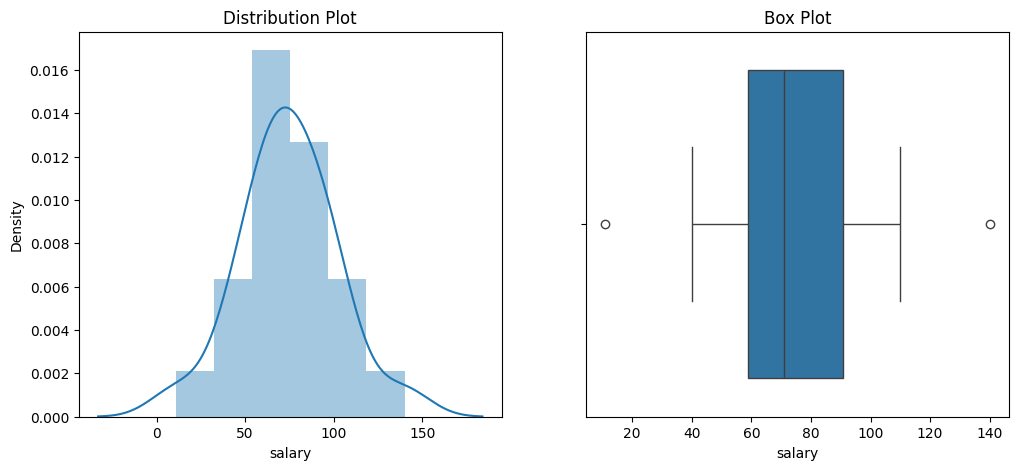

In [9]:
#To check outliers >> distplot, boxplot
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.distplot(df['salary'])
plt.title("Distribution Plot")

plt.subplot(1,2,2)
sns.boxplot(data=df,x='salary')
plt.title("Box Plot")
plt.show()

#dropping the outlier
#capping the outlier
#replace with mean and median
#Scaling and transformation

In [10]:
Q1=df['salary'].quantile(0.25)
Q3=df['salary'].quantile(0.75)



In [11]:
Q1

59.0

In [12]:
Q3

90.75

In [13]:
IQR=Q3-Q1

In [14]:
IQR

31.75

In [15]:
lower_fence = Q1-1.5*IQR
upper_fence = Q3+1.5*IQR

In [16]:
lower_fence

11.375

In [17]:
upper_fence

138.375

In [18]:
df.shape

(22, 1)

Values less than lower_fence and greater than  upper fence is the outlier

In [19]:
df_filtered=df[(df.salary>=lower_fence) & (df.salary<=upper_fence)]
df_filtered.shape

(20, 1)

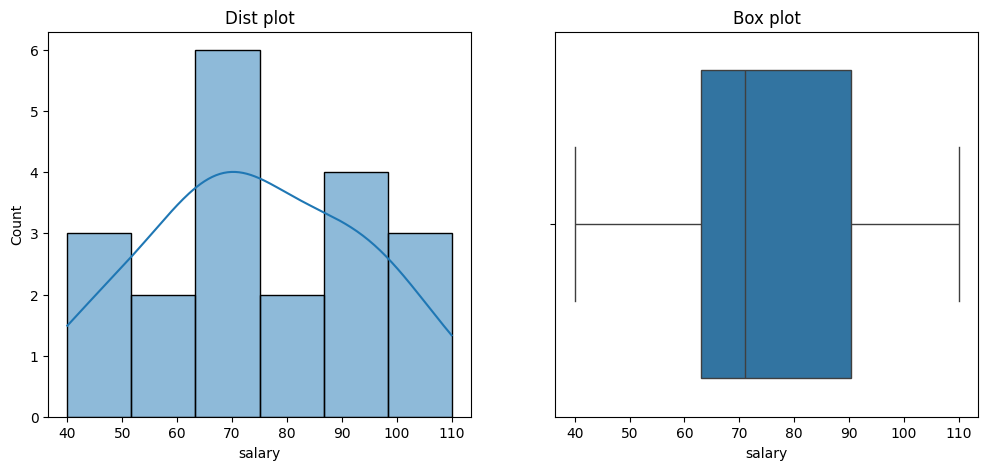

In [20]:
plt.figure(figsize = (12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df_filtered['salary'], kde = True)
plt.title("Dist plot")

plt.subplot(1, 2, 2)
sns.boxplot(data = df_filtered, x  = 'salary')
plt.title("Box plot")

plt.show()

In [21]:
#replace the outliers with mean and median
df['Salary_mean_imputed'] = np.where((df.salary >= upper_fence) | (df.salary <= lower_fence), df['salary'].mean(), df['salary'])
df

,salary,Salary_mean_imputed
0,11,74.318182
1,40,40.000000
2,45,45.000000
3,68,68.000000
4,65,65.000000
5,68,68.000000
6,78,78.000000
7,90,90.000000
8,57,57.000000
9,74,74.000000


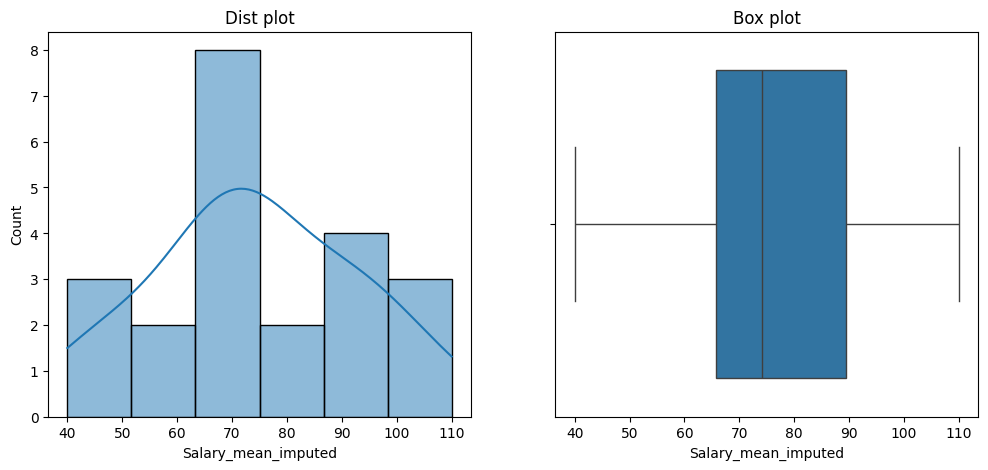

In [22]:
plt.figure(figsize = (12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['Salary_mean_imputed'], kde = True)
plt.title("Dist plot")
plt.subplot(1, 2, 2)
sns.boxplot(data = df, x  = 'Salary_mean_imputed')
plt.title("Box plot")

plt.show()

In [23]:
#capping >> replacing outlier with the nearest values that is not outlier

In [24]:
lower_cap = df['salary'].quantile(0.05) #lower cap as 5th percentile
upper_cap = df['salary'].quantile(0.95)

In [25]:
lower_cap

40.25

In [26]:
upper_cap


109.55

In [29]:
df['Salary_capped'] = np.where(df['salary'] < lower_cap, lower_cap,
                              np.where(df['salary'] > upper_cap, upper_cap, df['salary']))

In [28]:
df

,salary,Salary_mean_imputed
0,11,74.318182
1,40,40.000000
2,45,45.000000
3,68,68.000000
4,65,65.000000
5,68,68.000000
6,78,78.000000
7,90,90.000000
8,57,57.000000
9,74,74.000000


In [30]:
df

,salary,Salary_mean_imputed,Salary_capped
0,11,74.318182,40.25
1,40,40.000000,40.25
2,45,45.000000,45.00
3,68,68.000000,68.00
4,65,65.000000,65.00
5,68,68.000000,68.00
6,78,78.000000,78.00
7,90,90.000000,90.00
8,57,57.000000,57.00
9,74,74.000000,74.00


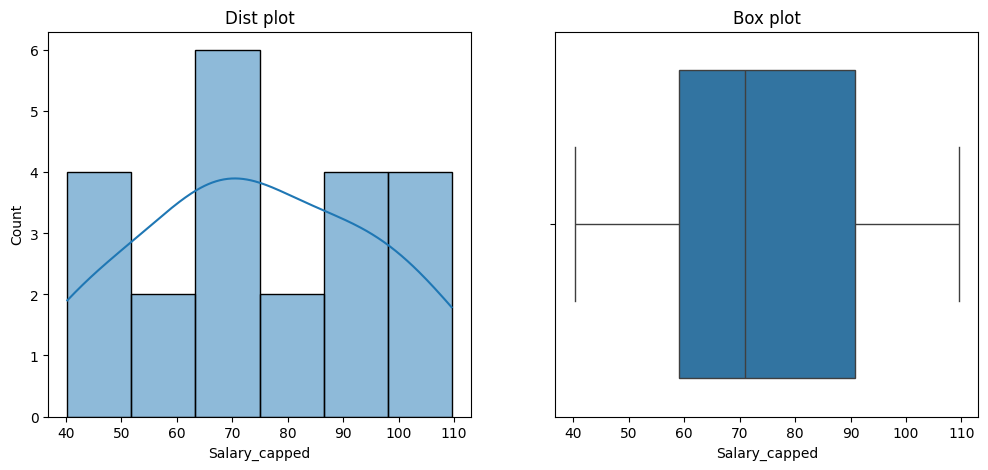

In [31]:
plt.figure(figsize = (12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['Salary_capped'], kde = True)
plt.title("Dist plot")

plt.subplot(1, 2, 2)
sns.boxplot(data = df, x  = 'Salary_capped')
plt.title("Box plot")

plt.show()